In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
# %matplotlib inline

# from IPython.display import Image

figsize = (10,10)


In [3]:
image_name = 'dana2'
img = cv2.imread(image_name+'.jpg')
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img0 = cv2.imread(image_name+'.jpg',0)
img0l = img_lab[:,:,0]

# cv2.imshow('dana', img)
# Image(data=img)

(532, 399)


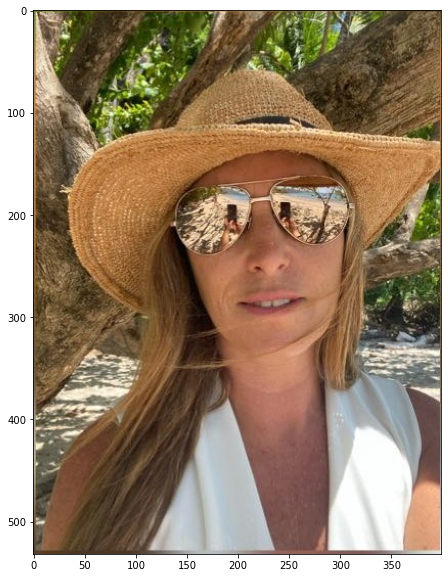

In [4]:
print(img0.shape)

figsize = (10,10)
plt.figure(figsize=figsize)

# plt.imshow(img0,cmap='gray')
# plt.imshow(img0.astype(float) - img0l.astype(float),cmap='gray')
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB))
plt.show()

In [ ]:
diff = img0.astype(float) - img0l.astype(float)
print(diff.max())
print(diff.mean())
print(diff.min())
print()


In [ ]:
res = np.hstack((img0, img0l)) #stacking images side-by-side
print(res.shape)

figsize = (20,10)
plt.figure(figsize=figsize)

plt.imshow(res,cmap='gray')
# plt.imshow(res)
plt.show()

In [ ]:

# create a CLAHE object (Arguments are optional).
# clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE()
#clahe = cv2.createCLAHE()
cl1 = clahe.apply(img0)


In [ ]:

# create a equalizeHist pic.

hist1 = cv2.equalizeHist(img0)


In [ ]:
res = np.hstack((img0, hist1, cl1)) #stacking images side-by-side
print(res.shape)

figsize = (30,10)
plt.figure(figsize=figsize)

plt.imshow(res,cmap='gray')
# plt.imshow(res)
plt.show()

In [ ]:

S = img0.shape

# tile = (5,5)
t = (8,8)
tile = (round(S[0]/t[0]) ,round(S[1]/t[1]))
print(tile)

tiles_count = np.zeros(S)
new_img = np.zeros(S)

# for i in range(round(S[0]-tile[0]/2)):
#     for j in range(round(S[1]-tile[1]/2)):
#         tiles_count[i:i+tile[0],j:j+tile[1]] = tiles_count[i:i+tile[0],j:j+tile[1]]+1

# for i in range(2*tile[0]):
# for i in range(S[0]-2*tile[0],S[0]):
for i in range(S[0]):
    # for j in range(2*tile[1]):
    # for j in range(S[1]-2*tile[1],S[1]):
    for j in range(S[1]):
        x_min = max(0,math.ceil(i-tile[0]/2))
        x_max = min(S[0],math.ceil(i+tile[0]/2))
        y_min = max(0,math.ceil(j-tile[1]/2))
        y_max = min(S[1],math.ceil(j+tile[1]/2))
        # print(x_min, " , ",x_max, " , ",y_min, " , ",y_max)

        tiles_count[x_min:x_max,y_min:y_max] += 1
        # print(tiles_count[x_min:x_max,y_min:y_max].shape)

        new_img[x_min:x_max,y_min:y_max] += cv2.equalizeHist(img0[x_min:x_max,y_min:y_max])





In [ ]:

def manipulate1(img, use_tile_size = True, tile_size = [32,32], grid_size = [8,8], show_img = True):

    # do histogram equalization
    hist = cv2.equalizeHist(img)

    # do adaptive histogram equalization
    # create a CLAHE object (Arguments are optional).
    # clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    if use_tile_size:
        clahe = cv2.createCLAHE()
    else:
        tuple
        clahe = cv2.createCLAHE(tileGridSize=tuple(grid_size))
        
    cl = clahe.apply(img)

    # do new adaptive histogram equalization
    S = img.shape

    if use_tile_size:
        tile = tile_size
        
    else:
        tile = (round(S[0]/grid_size[0]) ,round(S[1]/grid_size[1]))

    print(tile)

    tiles_count = np.zeros(S)
    new_img = np.zeros(S)

    # for i in range(round(S[0]-tile[0]/2)):
    #     for j in range(round(S[1]-tile[1]/2)):
    #         tiles_count[i:i+tile[0],j:j+tile[1]] = tiles_count[i:i+tile[0],j:j+tile[1]]+1

    # for i in range(2*tile[0]):
    # for i in range(S[0]-2*tile[0],S[0]):
    for i in range(S[0]):
        # for j in range(2*tile[1]):
        # for j in range(S[1]-2*tile[1],S[1]):
        for j in range(S[1]):
            x_min = max(0,math.ceil(i-tile[0]/2))
            x_max = min(S[0],math.ceil(i+tile[0]/2))
            y_min = max(0,math.ceil(j-tile[1]/2))
            y_max = min(S[1],math.ceil(j+tile[1]/2))
            # print(x_min, " , ",x_max, " , ",y_min, " , ",y_max)

            tiles_count[x_min:x_max,y_min:y_max] += 1
            # print(tiles_count[x_min:x_max,y_min:y_max].shape)

            new_img[x_min:x_max,y_min:y_max] += cv2.equalizeHist(img[x_min:x_max,y_min:y_max])

    new_img1 = new_img/tiles_count

    if show_img:
        res = np.hstack((img, hist, cl, new_img1)) #stacking images side-by-side
        print(res.shape)

        figsize = (40,10)
        plt.figure(figsize=figsize)

        plt.imshow(res,cmap='gray')
        plt.show()

    return hist, cl, new_img1, tiles_count



In [ ]:
new_img1 = new_img/tiles_count

In [ ]:

hist1, cl1, new_img1, tiles_count = manipulate1(img0l, use_tile_size=False, grid_size=[8,8], show_img = True)

# hist1[:,:,0], cl1, new_img1, tiles_count = manipulate1(img0, use_tile_size=False, grid_size=[8,8])

# plt.imshow(cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB))

# img.copy()

# res = np.hstack((img0l, hist1, cl1, new_img1)) #stacking images side-by-side
# cv2.imwrite('res_'+image_name+'_gray_l.jpg',res)



In [ ]:

def manipulate1_lab(img, use_tile_size_c = True, tile_size_c = [32,32], grid_size_c = [8,8], show_img = True):
    S = img.shape

    # hist = np.zeros(S)
    # cl = np.zeros(S)
    # new_img1 = np.zeros(S)

    hist = img.copy()
    cl = img.copy()
    new_img1 = img.copy()
    
    hist[:,:,0], cl[:,:,0], new_img1[:,:,0], tiles_count = manipulate1(img[:,:,0], use_tile_size=use_tile_size_c, tile_size=tile_size_c, grid_size=grid_size_c, show_img=False)

    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    # hist[:,:,1:3] = img[:,:,1:3]
    hist = cv2.cvtColor(hist, cv2.COLOR_LAB2RGB)
    # cl[:,:,1:3] = img[:,:,1:3]
    cl = cv2.cvtColor(cl, cv2.COLOR_LAB2RGB)
    # new_img1[:,:,1:3] = img[:,:,1:3]
    new_img1 = cv2.cvtColor(new_img1, cv2.COLOR_LAB2RGB)

    if show_img:
        res = np.hstack((img.astype(float)/256, hist/256, cl/256, new_img1/256)) #stacking images side-by-side
        print(res.shape)

        figsize = (40,10)
        plt.figure(figsize=figsize)

        plt.imshow(res)
        # plt.imshow(res, vmin=0, vmax=255)
        plt.show()

    return hist, cl, new_img1, tiles_count



In [ ]:

hist2, cl2, new_img2, tiles_count = manipulate1_lab(img_lab, use_tile_size_c=False, grid_size_c=[8,8], show_img = True)


# res = np.hstack((img, hist2, cl2, new_img2)) #stacking images side-by-side
# res = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
# cv2.imwrite('res_'+image_name+'_lab.jpg',res)



In [ ]:

def manipulate1_color(img, use_tile_size_c = True, tile_size_c = [32,32], grid_size_c = [8,8], show_img = True):
    S = img.shape

    hist = np.zeros(S)
    cl = np.zeros(S)
    new_img1 = np.zeros(S)

    for i in range(S[-1]):
        hist[:,:,i], cl[:,:,i], new_img1[:,:,i], tiles_count = manipulate1(img[:,:,i], use_tile_size=use_tile_size_c, tile_size=tile_size_c, grid_size=grid_size_c, show_img=False)


    if show_img and S[-1] == 3:
        res = np.hstack((img.astype(float)/256, hist/256, cl/256, new_img1/256)) #stacking images side-by-side
        print(res.shape)

        figsize = (40,10)
        plt.figure(figsize=figsize)

        plt.imshow(res)
        # plt.imshow(res, vmin=0, vmax=255)
        plt.show()

        
    if show_img and S[-1] == 1:
        res = np.hstack((img, hist, cl, new_img1)) #stacking images side-by-side
        print(res.shape)

        figsize = (40,10)
        plt.figure(figsize=figsize)

        plt.imshow(res,cmap='gray')
        plt.show()

        
    return hist, cl, new_img1, tiles_count



In [ ]:

hist3, cl3, new_img3, tiles_count = manipulate1_color(img, use_tile_size_c=False, grid_size_c=[8,8], show_img = True)

# S = img.shape
# S[-1]

# hist1 = img


# for i in range(3):
#     hist1[:,:,i], cl1, new_img1, tiles_count = manipulate1(img0, use_tile_size=False, grid_size=[8,8])


# res = np.hstack((img, hist3, cl3, new_img3)) #stacking images side-by-side
# # res = np.round(res)
# res = res.astype(np.float32)
# print(res.shape)
# res = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
# cv2.imwrite('res_'+image_name+'_color.jpg',res)



In [ ]:
print(tiles_count.shape)

figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(tiles_count,cmap='gray')
# plt.imshow(img)
plt.show()

In [ ]:
print(new_img1.shape)

figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(new_img1,cmap='gray')
# plt.imshow(img)
plt.show()

In [ ]:
print(new_img1.max())
print(new_img1.mean())
print(new_img1.min())
# print(new_img[0:10,0:10])
# print(new_img[630:750,630:750])

In [ ]:
res = np.hstack((img0, hist1, cl1, new_img1)) #stacking images side-by-side
# res = np.hstack((img.astype(float)/256, hist2/256, cl2/256, new_img2/256)) #stacking images side-by-side
# res = np.hstack((img.astype(float)/256, hist3/256, cl3/256, new_img3/256)) #stacking images side-by-side
# res = (new_img1-cl1)/256
print(res.shape)

figsize = (40,10)
plt.figure(figsize=figsize)

plt.imshow(res,cmap='gray')
# plt.imshow(res)
# plt.imshow(res, vmin=0, vmax=255)
plt.show()

In [ ]:

S = img0.shape

# tile = (5,5)
t = (8,8)
tile = (round(S[0]/t[0]) ,round(S[1]/t[1]))
print(tile)

# tiles_count = np.zeros(S)
# new_img = np.zeros(S)
img_mask1 = np.zeros(S)
img_mask2 = np.zeros(S)
img_mask3 = np.zeros(S)
img_mask4 = np.zeros(S)

# for i in range(round(S[0]-tile[0]/2)):
#     for j in range(round(S[1]-tile[1]/2)):
#         tiles_count[i:i+tile[0],j:j+tile[1]] = tiles_count[i:i+tile[0],j:j+tile[1]]+1

# for i in range(2*tile[0]):
# for i in range(S[0]-2*tile[0],S[0]):
for i in range(S[0]):
    # for j in range(2*tile[1]):
    # for j in range(S[1]-2*tile[1],S[1]):
    for j in range(S[1]):
        x_min = max(0,math.ceil(i-tile[0]/2))
        x_max = min(S[0],math.ceil(i+tile[0]/2))
        y_min = max(0,math.ceil(j-tile[1]/2))
        y_max = min(S[1],math.ceil(j+tile[1]/2))
        # print(x_min, " , ",x_max, " , ",y_min, " , ",y_max)

        # tiles_count[x_min:x_max,y_min:y_max] += 1
        # # print(tiles_count[x_min:x_max,y_min:y_max].shape)

        # new_img[x_min:x_max,y_min:y_max] += cv2.equalizeHist(img0[x_min:x_max,y_min:y_max])

        temp = cv2.equalizeHist(img0[x_min:x_max,y_min:y_max]).astype(float)
        # print(temp)
        # print(temp.dtype)
        # print()
        img_mask1[x_min:x_max,y_min:y_max] += (temp - new_img1[x_min:x_max,y_min:y_max])**2
        # print((temp - new_img1[x_min:x_max,y_min:y_max]))
        # print(img_mask1[x_min:x_max,y_min:y_max])
        # print()
        img_mask2[x_min:x_max,y_min:y_max] += (temp - hist1[x_min:x_max,y_min:y_max])**2
        # print((temp - hist1[x_min:x_max,y_min:y_max]))
        # print(img_mask2[x_min:x_max,y_min:y_max])
        # print()
        img_mask3[x_min:x_max,y_min:y_max] += (temp - img0[x_min:x_max,y_min:y_max])**2
        # print((temp - img0[x_min:x_max,y_min:y_max]))
        # print(img_mask3[x_min:x_max,y_min:y_max])
        # print()
        img_mask4[x_min:x_max,y_min:y_max] += (temp - cl1[x_min:x_max,y_min:y_max])**2
        # print((temp - cl1[x_min:x_max,y_min:y_max]))
        # print(img_mask4[x_min:x_max,y_min:y_max])
        # print()

img_mask1 = (img_mask1/tiles_count)**0.5
img_mask2 = (img_mask2/tiles_count)**0.5
img_mask3 = (img_mask3/tiles_count)**0.5
img_mask4 = (img_mask4/tiles_count)**0.5

In [ ]:

def manipulate2(img, hist, cl, new_img1, use_tile_size = True, tile_size = [32,32], grid_size = [8,8], show_masks = True):
    S = img.shape

    if use_tile_size:
        tile = tile_size
        
    else:
        tile = (round(S[0]/grid_size[0]) ,round(S[1]/grid_size[1]))

    print(tile)

    tiles_count = np.zeros(S)
    # new_img = np.zeros(S)
    img_mask1 = np.zeros(S)
    img_mask2 = np.zeros(S)
    img_mask3 = np.zeros(S)
    img_mask4 = np.zeros(S)

    # for i in range(round(S[0]-tile[0]/2)):
    #     for j in range(round(S[1]-tile[1]/2)):
    #         tiles_count[i:i+tile[0],j:j+tile[1]] = tiles_count[i:i+tile[0],j:j+tile[1]]+1

    # for i in range(2*tile[0]):
    # for i in range(S[0]-2*tile[0],S[0]):
    for i in range(S[0]):
        # for j in range(2*tile[1]):
        # for j in range(S[1]-2*tile[1],S[1]):
        for j in range(S[1]):
            x_min = max(0,math.ceil(i-tile[0]/2))
            x_max = min(S[0],math.ceil(i+tile[0]/2))
            y_min = max(0,math.ceil(j-tile[1]/2))
            y_max = min(S[1],math.ceil(j+tile[1]/2))
            # print(x_min, " , ",x_max, " , ",y_min, " , ",y_max)

            tiles_count[x_min:x_max,y_min:y_max] += 1
            # print(tiles_count[x_min:x_max,y_min:y_max].shape)

            # new_img[x_min:x_max,y_min:y_max] += cv2.equalizeHist(img0[x_min:x_max,y_min:y_max])

            temp = cv2.equalizeHist(img0[x_min:x_max,y_min:y_max]).astype(float)
            # print(temp)
            # print(temp.dtype)
            # print()
            img_mask1[x_min:x_max,y_min:y_max] += (temp - img[x_min:x_max,y_min:y_max])**2
            
            img_mask2[x_min:x_max,y_min:y_max] += (temp - hist[x_min:x_max,y_min:y_max])**2
            
            img_mask3[x_min:x_max,y_min:y_max] += (temp - cl[x_min:x_max,y_min:y_max])**2
            
            img_mask4[x_min:x_max,y_min:y_max] += (temp - new_img1[x_min:x_max,y_min:y_max])**2
            

    img_mask1 = (img_mask1/tiles_count)**0.5
    img_mask2 = (img_mask2/tiles_count)**0.5
    img_mask3 = (img_mask3/tiles_count)**0.5
    img_mask4 = (img_mask4/tiles_count)**0.5

    if show_masks:
        res = np.hstack((img_mask1, img_mask2, img_mask3, img_mask4)) #stacking images side-by-side
        # res = img_mask1

        print(res.shape)

        figsize = (40,10)
        plt.figure(figsize=figsize)

        plt.imshow(res,cmap='gray')
        # plt.imshow(res)
        plt.show()

    return img_mask1, img_mask2, img_mask3, img_mask4


In [ ]:

img_mask1, img_mask2, img_mask3, img_mask4 = manipulate2(img0l, hist1, cl1, new_img1, use_tile_size=False, grid_size=[8,8], show_masks=True)


# res = np.hstack((img_mask1, img_mask2, img_mask3, img_mask4)) #stacking images side-by-side
# cv2.imwrite('masks_'+image_name+'_gray_l.jpg',res)




In [ ]:

def manipulate2_color(img, hist, cl, new_img1, use_tile_size_c = True, tile_size_c = [32,32], grid_size_c = [8,8], show_masks = True):
    
    S = img.shape

    img_mask1 = np.zeros(S)
    img_mask2 = np.zeros(S)
    img_mask3 = np.zeros(S)
    img_mask4 = np.zeros(S)

    for i in range(S[-1]):
        img_mask1[:,:,i], img_mask2[:,:,i], img_mask3[:,:,i], img_mask4[:,:,i] = manipulate2(img[:,:,i], hist[:,:,i], cl[:,:,i], new_img1[:,:,i]
        , use_tile_size=use_tile_size_c, tile_size=tile_size_c, grid_size=grid_size_c, show_masks=False)

    if show_masks and S[-1] == 3:
        res = np.hstack((img_mask1/256, img_mask2/256, img_mask3/256, img_mask4/256)) #stacking images side-by-side
        print(res.shape)

        figsize = (40,10)
        plt.figure(figsize=figsize)

        plt.imshow(res)
        # plt.imshow(res, vmin=0, vmax=255)
        plt.show()

        
    if show_masks and S[-1] == 1:
        res = np.hstack((img_mask1, img_mask2, img_mask3, img_mask4)) #stacking images side-by-side
        print(res.shape)

        figsize = (40,10)
        plt.figure(figsize=figsize)

        plt.imshow(res,cmap='gray')
        plt.show()

        
    return img_mask1, img_mask2, img_mask3, img_mask4



In [ ]:

# img_mask1, img_mask2, img_mask3, img_mask4 = manipulate2(img0l, hist1, cl1, new_img1, use_tile_size=False, grid_size=[8,8], show_masks=True)


# res = np.hstack((img_mask1, img_mask2, img_mask3, img_mask4)) #stacking images side-by-side
# cv2.imwrite('masks_'+image_name+'_gray_l.jpg',res)

img_mask1_c, img_mask2_c, img_mask3_c, img_mask4_c = manipulate2_color(img, hist3, cl3, new_img3, use_tile_size_c=False, grid_size_c=[8,8], show_masks=True)

# S = img.shape
# S[-1]

# hist1 = img


# for i in range(3):
#     hist1[:,:,i], cl1, new_img1, tiles_count = manipulate1(img0, use_tile_size=False, grid_size=[8,8])


res = np.hstack((img_mask1_c, img_mask2_c, img_mask3_c, img_mask4_c)) #stacking images side-by-side
res = np.round(res)
res = res.astype(np.float32)
print(res.shape)
res = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
cv2.imwrite('masks_'+image_name+'_color.jpg',res)



In [ ]:

print(img_mask1.shape)

print(img_mask2.shape)

print(img_mask3.shape)

print(img_mask4.shape)


In [ ]:
# res = np.hstack((img_mask1, img_mask2, img_mask3, img_mask4)) #stacking images side-by-side
res = np.hstack((img_mask1/256, img_mask2/256, img_mask3/256, img_mask4/256)) #stacking images side-by-side
# res = np.hstack((img_mask2, img_mask3)) #stacking images side-by-side
# res = np.hstack((img_mask1, img_mask4)) #stacking images side-by-side
# res = img_mask1

print(res.shape)

figsize = (40,10)
plt.figure(figsize=figsize)

# plt.imshow(res,cmap='gray')
plt.imshow(res)
plt.show()

In [ ]:
# print(img0.var())

print(img_mask1.max())
print(img_mask1.mean())
print(img_mask1.min())
print()
print(img_mask2.max())
print(img_mask2.mean())
print(img_mask2.min())
print()
print(img_mask3.max())
print(img_mask3.mean())
print(img_mask3.min())
print()
print(img_mask4.max())
print(img_mask4.mean())
print(img_mask4.min())
print()


In [ ]:
# print(img0.var())

print(img_mask1_c.max())
print(img_mask1_c.mean())
print(img_mask1_c.min())
print()
print(img_mask2_c.max())
print(img_mask2_c.mean())
print(img_mask2_c.min())
print()
print(img_mask3_c.max())
print(img_mask3_c.mean())
print(img_mask3_c.min())
print()
print(img_mask4_c.max())
print(img_mask4_c.mean())
print(img_mask4_c.min())
print()


In [ ]:
temp.astype(float)
temp.dtype
img0l.dtype

In [ ]:

def manipulate3(img, new_img, img_mask, v2_type='global', use_tile_size = True, tile_size = [32,32], grid_size = [8,8], show_img = True, mask_power = 2):

    S = img.shape
    filtered_img = np.zeros(S)
    filter_power = np.zeros(S)
    mask = img_mask.copy()**mask_power
    
    # v2_type = ['local', 'global']
    if v2_type.lower() == 'global':
        v2 = mask.mean()

    if use_tile_size:
        tile = tile_size
        
    else:
        tile = (round(S[0]/grid_size[0]) ,round(S[1]/grid_size[1]))

    print(tile)

    # for i in range(2*tile[0]):
    # for i in range(S[0]-2*tile[0],S[0]):
    for i in range(S[0]):
        # for j in range(2*tile[1]):
        # for j in range(S[1]-2*tile[1],S[1]):
        for j in range(S[1]):
            x_min = max(0,math.ceil(i-tile[0]/2))
            x_max = min(S[0],math.ceil(i+tile[0]/2))
            y_min = max(0,math.ceil(j-tile[1]/2))
            y_max = min(S[1],math.ceil(j+tile[1]/2))
            # print(x_min, " , ",x_max, " , ",y_min, " , ",y_max)
            if v2_type.lower() != 'global':
                v2 = mask[x_min:x_max,y_min:y_max].mean()

            if (mask[i,j] + v2) == 0:
                filter_power[i,j] = 1
            else:
                filter_power[i,j] = (mask[i,j])/(mask[i,j] + v2)

            # print(v2)
            # print(mask[i,j])
            # print(filter_power)
            # print()

            # filtered_img[i,j] = new_img[i,j] + filter_power[i,j] * (img[i,j] - new_img[i,j])
            # filtered_img[i,j] = filter_power[i,j] * new_img[i,j] + (1 - filter_power[i,j]) * img[i,j]
            filtered_img[i,j] = filter_power[i,j] * img[i,j] + (1 - filter_power[i,j]) * new_img[i,j]
            filtered_img[i,j] = min(filtered_img[i,j], 255)
            filtered_img[i,j] = max(filtered_img[i,j], 0)
            

    if show_img:
        res = np.hstack((img, new_img, filtered_img)) #stacking images side-by-side
        print(res.shape)

        figsize = (40,10)
        plt.figure(figsize=figsize)

        plt.imshow(res,cmap='gray')
        plt.show()


    print(filter_power.max())
    print(filter_power.mean())
    print(filter_power.min())
    print()


    return filtered_img


In [ ]:

# manipulate2(img0, hist1, cl1, new_img1, tiles_count, use_tile_size=False, grid_size=[8,8])

show_img=True

# v2_type = ['local', 'global']
v2_type='local'

# filtered_img1 = manipulate3(img0l, new_img1, img_mask4, v2_type='global', use_tile_size=False, grid_size=[8,8], show_img=False)
# filtered_img2 = manipulate3(img0l, new_img1, img_mask4, v2_type='local', use_tile_size=False, grid_size=[8,8], show_img=False)


# filtered_img0 = manipulate3(img0l, img0l, img_mask1, v2_type=v2_type, use_tile_size=False, grid_size=[8,8], show_img=show_img)
filtered_img1 = manipulate3(img0l, hist1, img_mask2, v2_type=v2_type, use_tile_size=False, grid_size=[8,8], show_img=show_img)
filtered_img2 = manipulate3(img0l, cl1, img_mask3, v2_type=v2_type, use_tile_size=False, grid_size=[8,8], show_img=show_img)
filtered_img3 = manipulate3(img0l, new_img1, img_mask4, v2_type=v2_type, use_tile_size=False, grid_size=[8,8], show_img=show_img)


res = np.hstack((img0l, filtered_img1, filtered_img2, filtered_img3)) #stacking images side-by-side

# res = img_mask1

print(res.shape)

figsize = (40,10)
plt.figure(figsize=figsize)

plt.imshow(res,cmap='gray')
# plt.imshow(res)
plt.show()

cv2.imwrite('filtered_'+image_name+'_gray_l.jpg',res)



In [ ]:

S = img_lab.shape
# print(S)

# filtered_img1_lab = np.zeros(S)
filtered_img1_lab = img_lab.copy()
# filtered_img2_lab = np.zeros(S)
filtered_img2_lab = img_lab.copy()
# filtered_img3_lab = np.zeros(S)
filtered_img3_lab = img_lab.copy()

filtered_img1_lab[:,:,0] = filtered_img1
filtered_img1_lab = cv2.cvtColor(filtered_img1_lab, cv2.COLOR_LAB2RGB)
filtered_img2_lab[:,:,0] = filtered_img2
filtered_img2_lab = cv2.cvtColor(filtered_img2_lab, cv2.COLOR_LAB2RGB)
filtered_img3_lab[:,:,0] = filtered_img3
filtered_img3_lab = cv2.cvtColor(filtered_img3_lab, cv2.COLOR_LAB2RGB)


res = np.hstack((img, filtered_img1_lab, filtered_img2_lab, filtered_img3_lab)) #stacking images side-by-side

print(res.shape)

figsize = (40,10)
plt.figure(figsize=figsize)

plt.imshow(res/256)
# plt.imshow(res, vmin=0, vmax=255)
plt.show()

res = np.round(res)
res = res.astype(np.float32)
res = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
cv2.imwrite('filtered_'+image_name+'_lab.jpg',res)



In [ ]:

def manipulate3_color(img, new_img, img_mask, v2_type='global', 
use_tile_size_c = True, tile_size_c = [32,32], grid_size_c = [8,8], show_img_c = True, mask_power_c = 2):

    S = img.shape
    filtered_img = np.zeros(S)

    
    for i in range(S[-1]):
        filtered_img[:,:,i] = manipulate3(img[:,:,i], new_img[:,:,i], img_mask[:,:,i], 
        v2_type=v2_type, use_tile_size=use_tile_size_c, grid_size=grid_size_c, show_img=False, mask_power=mask_power_c)

    if show_img_c and S[-1] == 3:
        res = np.hstack((img/256, new_img/256, filtered_img/256)) #stacking images side-by-side
        print(res.shape)

        figsize = (30,10)
        plt.figure(figsize=figsize)

        plt.imshow(res)
        # plt.imshow(res, vmin=0, vmax=255)
        plt.show()

        
    if show_img_c and S[-1] == 1:
        res = np.hstack((img, new_img, filtered_img)) #stacking images side-by-side
        print(res.shape)

        figsize = (30,10)
        plt.figure(figsize=figsize)

        plt.imshow(res,cmap='gray')
        plt.show()

    return filtered_img



In [ ]:

show_img_c=True

# v2_type = ['local', 'global']
v2_type='local'

filtered_img1_c = manipulate3_color(img, hist3, img_mask2_c, v2_type=v2_type, use_tile_size_c=False, grid_size_c=[8,8], show_img_c=show_img_c)
filtered_img2_c = manipulate3_color(img, cl3, img_mask3_c, v2_type=v2_type, use_tile_size_c=False, grid_size_c=[8,8], show_img_c=show_img_c)
filtered_img3_c = manipulate3_color(img, new_img3, img_mask4_c, v2_type=v2_type, use_tile_size_c=False, grid_size_c=[8,8], show_img_c=show_img_c)




res = np.hstack((img, filtered_img1_c, filtered_img2_c, filtered_img3_c)) #stacking images side-by-side

print(res.shape)

figsize = (40,10)
plt.figure(figsize=figsize)

plt.imshow(res/256)
# plt.imshow(res, vmin=0, vmax=255)
plt.show()

res = np.round(res)
res = res.astype(np.float32)
res = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
cv2.imwrite('filtered_'+image_name+'_color.jpg',res)



In [ ]:

def do_wiener(img, v2_type='global', use_tile_size = True, tile_size = [32,32], grid_size = [8,8]):

    S = img.shape
    filtered_img = np.zeros(S)
    img_mask = np.zeros(S)
    new_img = np.zeros(S)

    if use_tile_size:
        tile = tile_size
        
    else:
        tile = (round(S[0]/grid_size[0]) ,round(S[1]/grid_size[1]))

    print(tile)
    
    # for i in range(2*tile[0]):
    # for i in range(S[0]-2*tile[0],S[0]):
    for i in range(S[0]):
        # for j in range(2*tile[1]):
        # for j in range(S[1]-2*tile[1],S[1]):
        for j in range(S[1]):
            x_min = max(0,math.ceil(i-tile[0]/2))
            x_max = min(S[0],math.ceil(i+tile[0]/2))
            y_min = max(0,math.ceil(j-tile[1]/2))
            y_max = min(S[1],math.ceil(j+tile[1]/2))
            # print(x_min, " , ",x_max, " , ",y_min, " , ",y_max)
            # img_mask1[x_min:x_max,y_min:y_max] += (temp - img[x_min:x_max,y_min:y_max])**2

            new_img[i,j] = img[x_min:x_max,y_min:y_max].mean()
            img_mask[i,j] = img[x_min:x_max,y_min:y_max].var()
    
    # v2_type = ['local', 'global']
    if v2_type.lower() == 'global':
        v2 = img_mask.mean()

    # for i in range(2*tile[0]):
    # for i in range(S[0]-2*tile[0],S[0]):
    for i in range(S[0]):
        # for j in range(2*tile[1]):
        # for j in range(S[1]-2*tile[1],S[1]):
        for j in range(S[1]):
            x_min = max(0,math.ceil(i-tile[0]/2))
            x_max = min(S[0],math.ceil(i+tile[0]/2))
            y_min = max(0,math.ceil(j-tile[1]/2))
            y_max = min(S[1],math.ceil(j+tile[1]/2))
            # print(x_min, " , ",x_max, " , ",y_min, " , ",y_max)
            if v2_type.lower() != 'global':
                v2 = img_mask[x_min:x_max,y_min:y_max].mean()

            if img_mask[i,j] == 0:
                wiener = 1
            else:
                wiener = (img_mask[i,j] - v2)/img_mask[i,j]

            # print(v2)
            # print(img_mask[i,j])
            # print(wiener)
            # print()

            filtered_img[i,j] = new_img[i,j] + wiener * (img[i,j] - new_img[i,j])
            filtered_img[i,j] = min(filtered_img[i,j], 255)
            filtered_img[i,j] = max(filtered_img[i,j], 0)


    return filtered_img


In [ ]:


# manipulate2(img0, hist1, cl1, new_img1, tiles_count, use_tile_size=False, grid_size=[8,8])
# filtered_img1 = manipulate3(img0, new_img1, img_mask4, v2_type='global', use_tile_size=False, grid_size=[8,8])
# filtered_img2 = manipulate3(img0, new_img1, img_mask4, v2_type='local', use_tile_size=False, grid_size=[8,8])
filtered_img1 = do_wiener(img0, v2_type='local', tile_size=[5,5])
filtered_img2 = do_wiener(img0, v2_type='local', tile_size=[10,10])



In [ ]:

res = np.hstack((img0, filtered_img1, filtered_img2)) #stacking images side-by-side
# res = np.hstack((img0, filtered_img)) #stacking images side-by-side
# res = filtered_img
print(res.shape)

figsize = (40,10)
plt.figure(figsize=figsize)

plt.imshow(res,cmap='gray')
# plt.imshow(res)
plt.show()